In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import seaborn as sns

# **1. Data pre-processing (show your process)**

In [ ]:
#https://drive.google.com/file/d/1_sA6pTYT8Sq5bfAS3SSg_iGXYfnWgPBo/view?usp=drive_link

file_id = '1_sA6pTYT8Sq5bfAS3SSg_iGXYfnWgPBo'
link = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(link)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,Iloilo,192261.83
1,162597.70,151377.59,443898.53,Bacolod,191792.06
2,153441.51,101145.55,407934.54,Cebu,191050.39
3,144372.41,118671.85,383199.62,NaN,182901.99
4,142107.34,91391.77,366168.42,Iloilo,166187.94


In [ ]:
df.shape #size of data

(50, 5)

In [ ]:
df.columns #Features

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.isna().sum()
#number of all missing datapoints

R&D Spend          2
Administration     1
Marketing Spend    0
State              3
Profit             0
dtype: int64

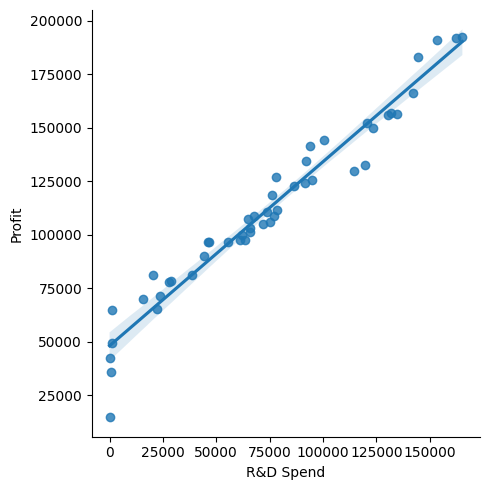

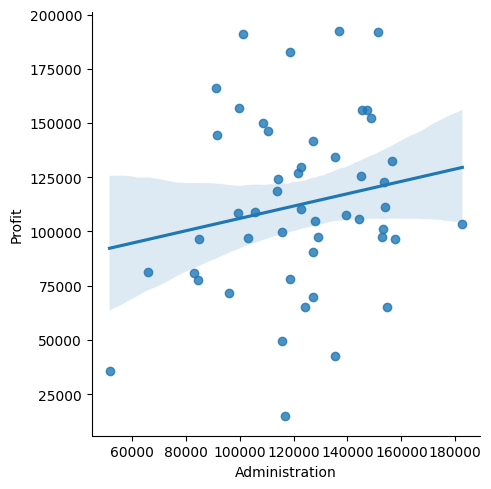

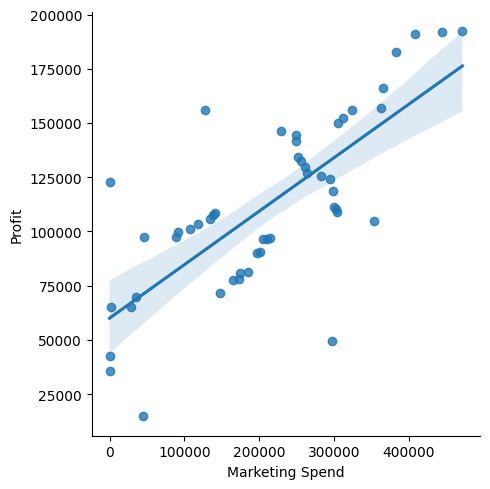

In [ ]:
sns.lmplot(x='R&D Spend', y='Profit', data=df)
sns.lmplot(x='Administration', y='Profit', data=df)
sns.lmplot(x='Marketing Spend', y='Profit', data=df)

Handling missing data

In [ ]:
df['R&D Spend'] = df['R&D Spend'].interpolate(method='linear')
df['Administration'] = df['Administration'].interpolate(method='linear')
df['State'].fillna(df['State'].mode()[0], inplace=True)

dfs = df
dfs

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.200,136897.80,471784.10,Iloilo,192261.83
1,162597.700,151377.59,443898.53,Bacolod,191792.06
2,153441.510,101145.55,407934.54,Cebu,191050.39
3,144372.410,118671.85,383199.62,Iloilo,182901.99
4,142107.340,91391.77,366168.42,Iloilo,166187.94
5,131876.900,99814.71,362861.36,Bacolod,156991.12
6,134615.460,147198.87,127716.82,Cebu,156122.51
7,130298.130,145530.06,323876.68,Makati,155752.60
8,120542.520,148718.95,311613.29,Iloilo,152211.77
9,123334.880,108679.17,304981.62,Iloilo,149759.96


In [ ]:
x = dfs.iloc[:, :-2].values
y = dfs.iloc[:, -1].values

print("INDEPENDENT VARIABLE:\n", x)
print("DEPENDENT VARIABLE:\n", y)

INDEPENDENT VARIABLE:
 [[165349.2   136897.8   471784.1  ]
 [162597.7   151377.59  443898.53 ]
 [153441.51  101145.55  407934.54 ]
 [144372.41  118671.85  383199.62 ]
 [142107.34   91391.77  366168.42 ]
 [131876.9    99814.71  362861.36 ]
 [134615.46  147198.87  127716.82 ]
 [130298.13  145530.06  323876.68 ]
 [120542.52  148718.95  311613.29 ]
 [123334.88  108679.17  304981.62 ]
 [112003.42  110594.11  229160.95 ]
 [100671.96   91790.61  249744.55 ]
 [ 93863.75  127320.38  249839.44 ]
 [ 91992.39  135495.07  252664.93 ]
 [119943.24  156547.42  256512.92 ]
 [114523.61  122616.84  261776.23 ]
 [ 78013.11  121597.55  264346.06 ]
 [ 94657.16  145077.58  282574.31 ]
 [ 91749.16  114175.79  294919.57 ]
 [ 86419.7   153514.11       0.   ]
 [ 76253.86  113867.3   298664.47 ]
 [ 78389.47  153773.43  299737.29 ]
 [ 73994.56  122782.75  303319.26 ]
 [ 67532.53  105751.03  304768.73 ]
 [ 77044.01   99281.34  140574.81 ]
 [ 64664.71  139553.16  137962.62 ]
 [ 75328.87  144135.98  134050.07 ]
 [ 72

In [ ]:
'''categorical_columns = ['State']

categorical_indices = [dfs.columns.get_loc(col) for col in categorical_columns]

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse=False), categorical_indices)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

x = ct.fit_transform(x)
x'''


# **2. Creating Multiple Linear Regression**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state= 1)

print("X Train:\n",x_train)
print("X Test:\n",x_test)
print("Y Train:\n",y_train)
print("Y Test:\n",y_test)

X Train:
 [[ 63408.86  129219.61   46085.25 ]
 [ 38558.51   82982.09  174999.3  ]
 [ 78389.47  153773.43  299737.29 ]
 [ 45041.985 127056.21  201126.82 ]
 [ 86419.7   153514.11       0.   ]
 [ 23640.93   96189.63  148001.11 ]
 [     0.    116983.8    45173.06 ]
 [ 75328.87  144135.98  134050.07 ]
 [ 73994.56  122782.75  303319.26 ]
 [ 91992.39  135495.07  252664.93 ]
 [ 27892.92   84710.77  164470.71 ]
 [ 94657.16  145077.58  282574.31 ]
 [  1000.23  124153.04    1903.93 ]
 [ 77044.01   99281.34  140574.81 ]
 [ 67532.53  105751.03  304768.73 ]
 [142107.34   91391.77  366168.42 ]
 [ 55493.95  103057.49  214634.81 ]
 [119943.24  156547.42  256512.92 ]
 [ 61994.48  115641.28   91131.24 ]
 [112003.42  110594.11  229160.95 ]
 [ 66051.52  182645.56  118148.2  ]
 [ 22177.74  154806.14   28334.72 ]
 [ 46426.07  157693.92  210797.67 ]
 [ 91749.16  114175.79  294919.57 ]
 [ 76253.86  113867.3   298664.47 ]
 [ 64664.71  139553.16  137962.62 ]
 [134615.46  147198.87  127716.82 ]
 [130298.13  14553

In [ ]:
from sklearn import metrics
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from statsmodels.regression.linear_model import OLS

In [ ]:
model = LinearRegression()

# Train the model on the training data using Multiple Linear Regression
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
pred = pd.DataFrame()   # dataframe for predictions vs actual y-values
pred['predictions'] = model.predict(x_test)


print(model.predict(x_test))
pred

[113411.70574711  89597.30508827  74794.47877312  68895.35176493
 179386.95172899 171425.38250577  48936.9042108  101996.80929108
  56145.96833649  98001.49623419]


,predictions
0,113411.705747
1,89597.305088
2,74794.478773
3,68895.351765
4,179386.951729
5,171425.382506
6,48936.904211
7,101996.809291
8,56145.968336
9,98001.496234


In [ ]:
model.score(x_test,y_test)*100

96.60093994882381

In [ ]:
prediction = model.predict(x_test)

In [ ]:
fin = pd.DataFrame({"Actual": y[:10], "Predicted": pred['predictions'][:10]})
fin

,Actual,Predicted
0,192261.83,113411.705747
1,191792.06,89597.305088
2,191050.39,74794.478773
3,182901.99,68895.351765
4,166187.94,179386.951729
5,156991.12,171425.382506
6,156122.51,48936.904211
7,155752.60,101996.809291
8,152211.77,56145.968336
9,149759.96,98001.496234


# **Saving the prediction model**

In [ ]:
import pickle

print("Mean sq. errror between y_test and predictions =", np.mean(pred['predictions']-y_test)**2)

Mean sq. errror between y_test and predictions = 2550145.92315252


In [ ]:
pickle.dump(model, open('prediction_model.pkl', 'wb'))

In [ ]:
model1 = pickle.load(open('prediction_model.pkl','rb'))

In [ ]:
print(model1.predict([[91749.16000, 114175.790000, 294919.57]]))

[127672.67914632]
